In [1]:
from logging import getLogger
from tqdm import tqdm
import torch
import numpy as np
import pandas as pd
import pickle
import os

import copy
from collections import OrderedDict
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)


In [5]:
work_path = 'output/lanzhou/user_0.8/'
for length in range(0, 71, 10):
    file = os.path.join(work_path, f'seq_len.{length}-epoch.log')
    with open(file, 'r') as f:
        for i, line in enumerate(f.readlines()):
            if i % 3 == 0:
                continue
            line = line.strip()
            print(i, line)
    break

1 trans: 0.1765 0.1078 0.1242 0.1765 0.0176
2 meta: 0.1294 0.1235 0.1251 0.1294 0.0129
4 trans: 0.0806 0.0341 0.0452 0.0806 0.0081
5 meta: 0.0968 0.0766 0.0816 0.0968 0.0097
7 trans: 0.2000 0.1519 0.1632 0.2000 0.0200
8 meta: 0.1778 0.1667 0.1696 0.1778 0.0178
10 trans: 0.1515 0.1020 0.1134 0.1515 0.0152
11 meta: 0.0909 0.0909 0.0909 0.0909 0.0091
13 trans: 0.0294 0.0029 0.0085 0.0294 0.0029
14 meta: 0.0000 0.0000 0.0000 0.0000 0.0000
16 trans: 0.0400 0.0200 0.0252 0.0400 0.0040
17 meta: 0.0800 0.0800 0.0800 0.0800 0.0080
19 trans: 0.1250 0.0703 0.0822 0.1250 0.0125
20 meta: 0.1875 0.1328 0.1447 0.1875 0.0188
22 trans: 0.0526 0.0263 0.0332 0.0526 0.0053
23 meta: 0.0526 0.0105 0.0204 0.0526 0.0053
25 trans: 0.0339 0.0339 0.0339 0.0339 0.0034
26 meta: 0.1017 0.0847 0.0892 0.1017 0.0102
28 trans: 0.0333 0.0167 0.0210 0.0333 0.0033
29 meta: 0.0333 0.0333 0.0333 0.0333 0.0033
31 trans: 0.0000 0.0000 0.0000 0.0000 0.0000
32 meta: 0.0000 0.0000 0.0000 0.0000 0.0000


In [9]:
work_path = 'output/lanzhou/user_0.8/'
trans_result = []
meta_result = []
for length in range(0, 71, 10):
    file = os.path.join(work_path, f'seq_len.{length}-epoch.log')
    trans_length_result = []
    meta_length_result = []
    with open(file, 'r') as f:
        for i, line in enumerate(f.readlines()):
            if i % 3 == 0:
                continue
            line = line.strip()
            key, value = line.split(':')
            res = trans_length_result if key == 'trans' else meta_length_result
            res.append(list(map(float, value.split())))
    trans_result.append(trans_length_result)
    meta_result.append(meta_length_result)
trans_result = np.array(trans_result)
meta_result = np.array(meta_result)

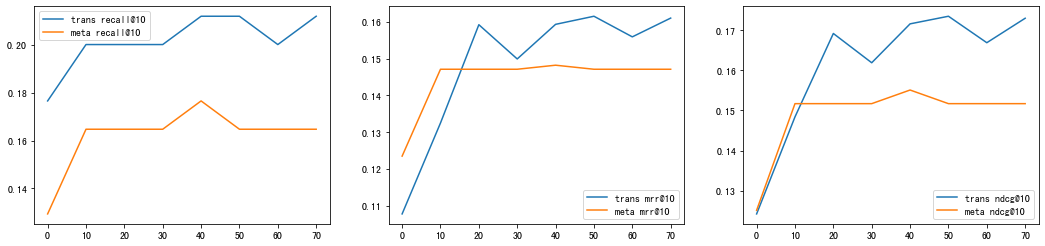

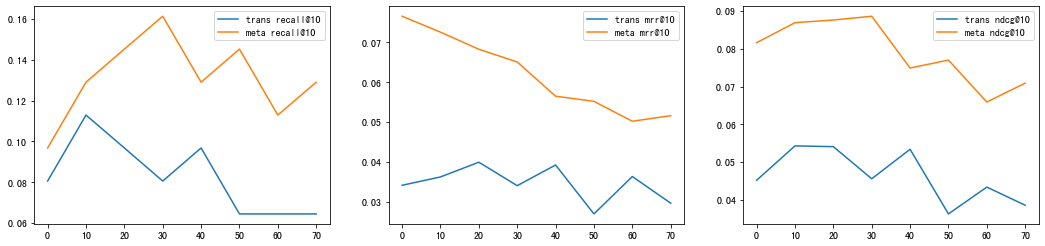

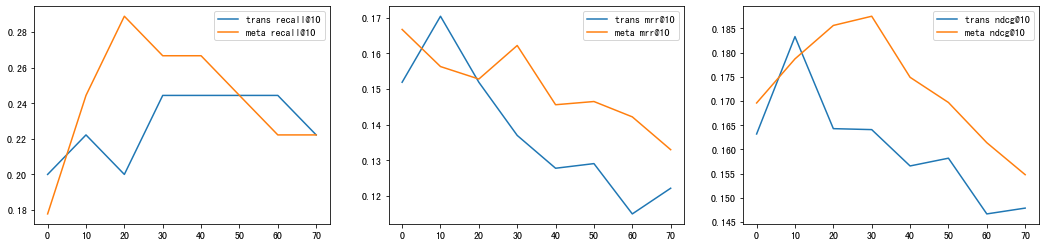

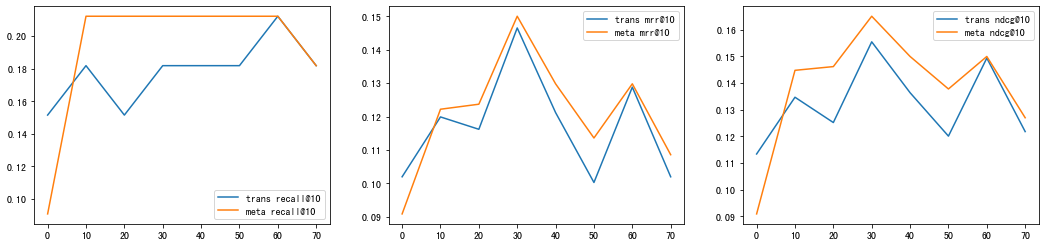

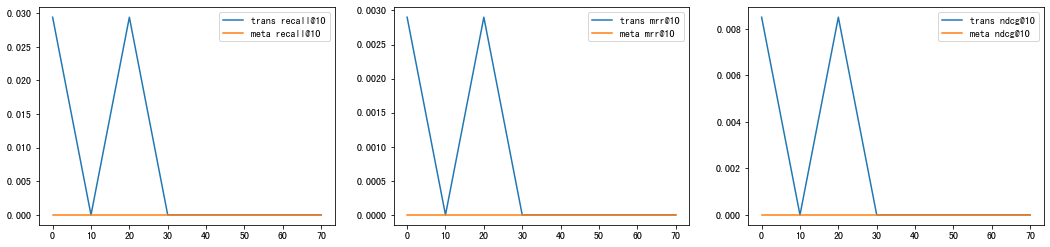

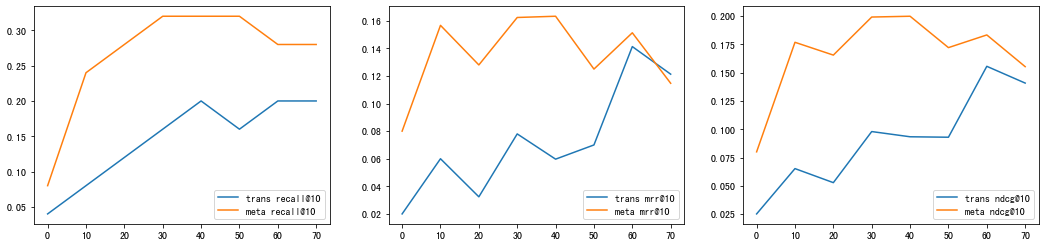

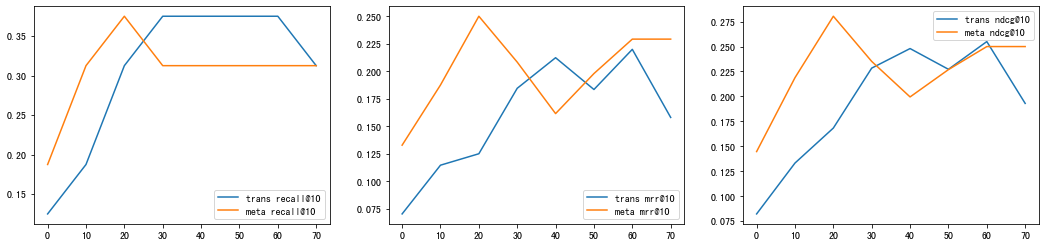

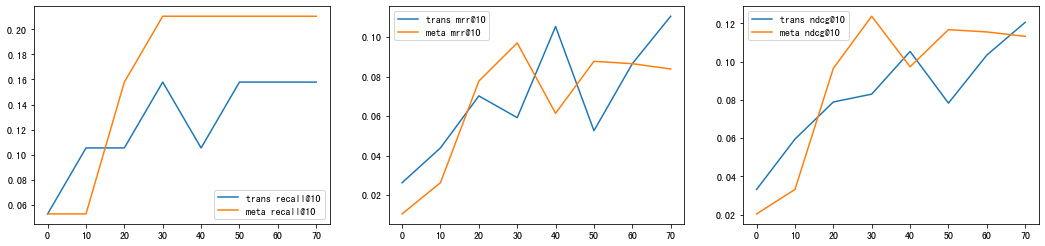

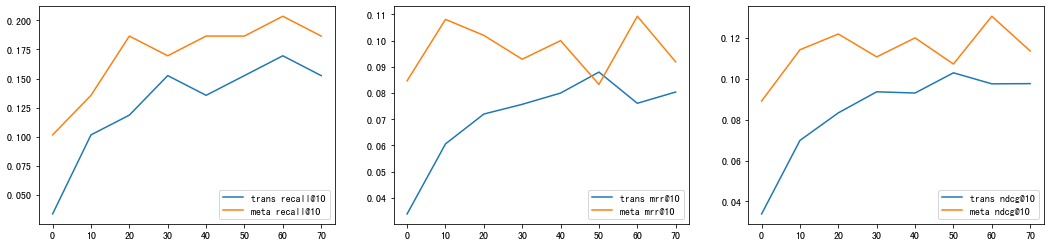

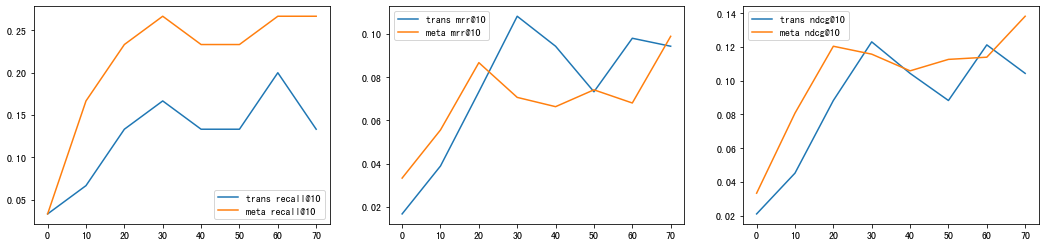

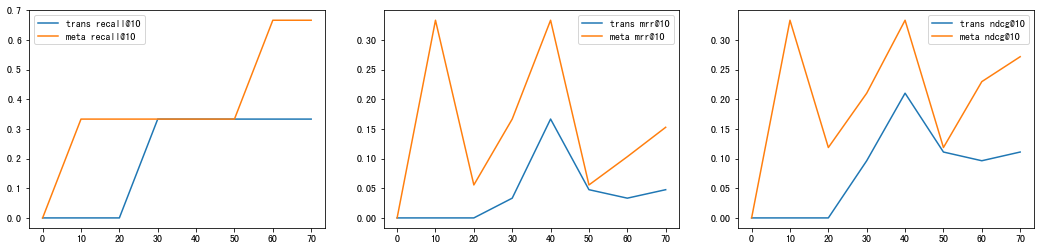

In [31]:
length_range = np.arange(0, 71, 10)
for i in range(trans_result.shape[1]):
    plt.figure(figsize=(6 * 3, 4))
    metrics = ['recall@10', 'mrr@10', 'ndcg@10']
    for j, metric in enumerate(metrics):
        plt.subplot(1, 3, j + 1)
        plt.plot(length_range, trans_result[:, i, j], label=f'trans {metric}')
        plt.plot(length_range, meta_result[:, i, j], label=f'meta {metric}')
        plt.legend()
    plt.show()
    # break

In [8]:
work_path = 'output/xining/new_user_0.8/transformer'
meta_result = []
for i in range(-1, 10):
    file = os.path.join(work_path, f'seq_anal_{i}.log')
    meta_i_result = []
    with open(file, 'r') as f:
        for i, line in enumerate(f.readlines()):
            if i % 2 == 0:
                continue
            line = line.strip()
            meta_i_result.append(list(map(float, line.split())))
    meta_result.append(meta_i_result)
meta_result = np.array(meta_result)
meta_result

array([[[0.0682, 0.0335, 0.0417, 0.0682, 0.0068],
        [0.2564, 0.1389, 0.1689, 0.2564, 0.0256],
        [0.3684, 0.2017, 0.2437, 0.3684, 0.0368],
        [0.2692, 0.1583, 0.1848, 0.2692, 0.0269],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.4286, 0.2381, 0.2848, 0.4286, 0.0429],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.0167],
        [0.2353, 0.062 , 0.1025, 0.2353, 0.0235],
        [0.3478, 0.1295, 0.1779, 0.3478, 0.0348],
        [0.5   , 0.25  , 0.3155, 0.5   , 0.05  ]],

       [[0.0682, 0.0218, 0.0329, 0.0682, 0.0068],
        [0.2564, 0.1389, 0.1689, 0.2564, 0.0256],
        [0.3684, 0.2017, 0.2437, 0.3684, 0.0368],
        [0.2692, 0.1583, 0.1848, 0.2692, 0.0269],
        [0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.5   , 0.25  , 0.3112, 0.5   , 0.05  ],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.0167],
        [0.2353, 0.062 , 0.1025, 0.2353, 0.0235],
        [0.3043, 0.1251, 0.1653, 0.3043, 0.0304],
        [0.5   , 0.25  , 0.3155, 0.5   , 0.05  ]

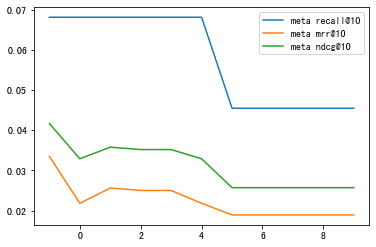

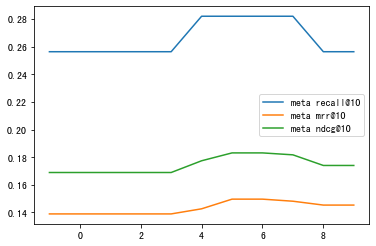

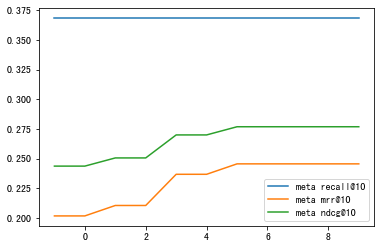

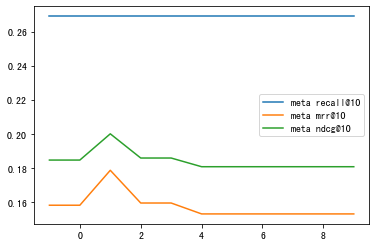

/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


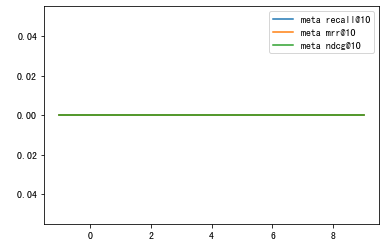

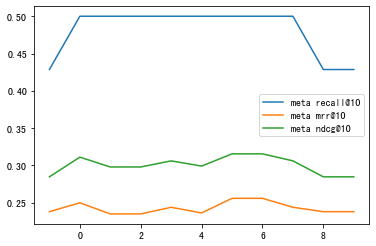

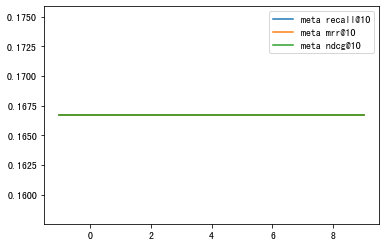

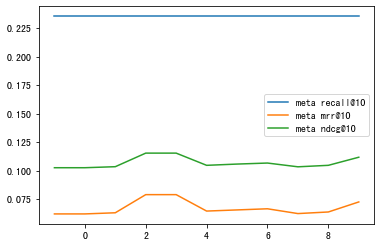

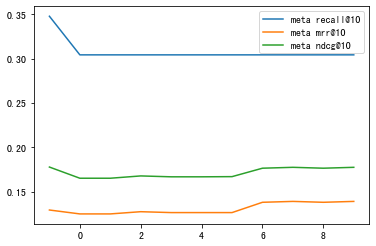

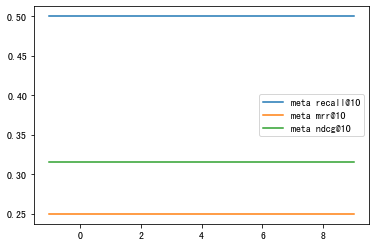

In [9]:
metrics = ['recall@10', 'mrr@10', 'ndcg@10']
epoch_range = np.arange(-1, 10)
for i in range(meta_result.shape[1]):
    for j, metric in enumerate(metrics):
        plt.plot(epoch_range, meta_result[:, i, j], label=f'meta {metric}')
    plt.legend()
    plt.show()